In [279]:
#anna guidi, ag2388

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, cross_validation, metrics, model_selection
from ipywidgets import interact, interactive, fixed, interact_manual
from numpy import linalg as LA
from statistics import mode
import math
from collections import Counter
import csv

In [281]:
from tqdm import tqdm

In [282]:
%matplotlib inline

In [283]:
training = pd.read_csv('train.csv')

In [284]:
testing = pd.read_csv('test.csv')

In [285]:
x_training = training.iloc[:, 1:].values

In [286]:
y_training = training.iloc[:, 0]

In [357]:
x_testing = testing.iloc[:, :].values

In [288]:
x_testing

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [289]:
x_training[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [290]:
y_training[0]

1

In [291]:
x_training.shape

(42000, 784)

In [292]:
#display one of each digit

In [293]:
#step 1: find one label for each number in label_array

In [294]:
a = np.array(y_training)
u, indices = np.unique(a, return_index=True)
row_number = indices
row_number

array([ 1,  0, 16,  7,  3,  8, 21,  6, 10, 11])

In [295]:
#turn on visualization
plt.matplotlib.pyplot.ion()

## display one of each digit

number: 0
number: 1
number: 2
number: 3
number: 4
number: 5
number: 6
number: 7
number: 8
number: 9


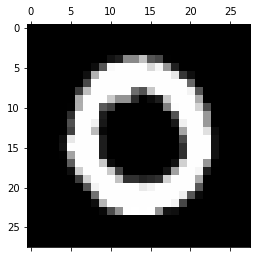

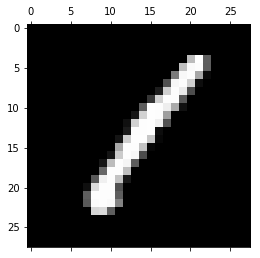

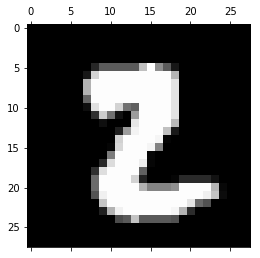

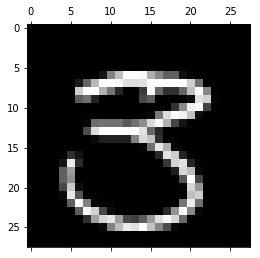

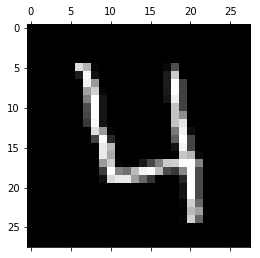

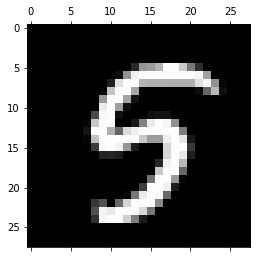

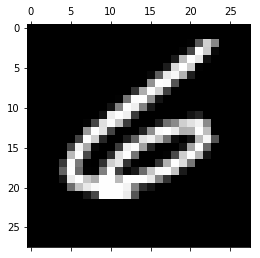

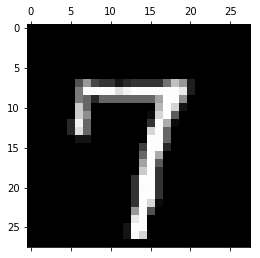

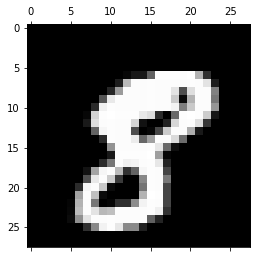

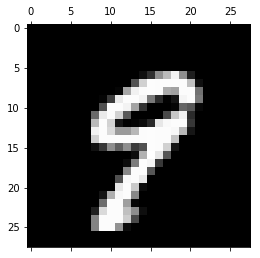

In [296]:
def show_image(n):
    print("number:", y_training[n])
    plt.matshow(x_training[n].reshape(28,28), cmap='gray') 
    
for n in row_number:
    show_image(n)

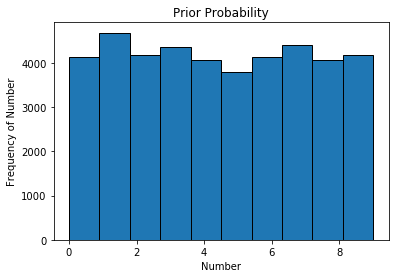

In [297]:
gaussian_numbers = y_training[:]
plt.hist(gaussian_numbers, edgecolor='black', linewidth=1)
plt.title("Prior Probability")
plt.xlabel("Number")
plt.ylabel("Frequency of Number")

plt.show()

In [298]:
# Pick one example of each digit from your training data. Then, for each sample digit, compute
# and show the best match (nearest neighbor) between your chosen sample and the rest
array_of_distances = []

for i in row_number:
    distances = []
    for index, row in enumerate(x_training):
        if np.array_equal(row, x_training[i]):
            continue
        else:
            distances.append(tuple((np.linalg.norm(x_training[i]-row), index)))
    array_of_distances.append(distances)

In [299]:
array_of_distances

[[(3307.6387348076573, 0),
  (3224.552061914957, 2),
  (3043.9461230448874, 3),
  (1358.3188138283294, 4),
  (2694.053451585547, 5),
  (3029.5129971663764, 6),
  (3149.364856602042, 7),
  (3194.1019082051844, 8),
  (2850.4713645290317, 9),
  (3392.539167054671, 10),
  (3293.681526802493, 11),
  (3274.393378932959, 12),
  (3123.7972085268275, 13),
  (2625.4489139954712, 14),
  (3212.6087530230006, 15),
  (2892.0926679482454, 16),
  (2898.4739088009746, 17),
  (3023.2692569468568, 18),
  (2667.4204767902643, 19),
  (3189.5540440632135, 20),
  (3097.9170421429944, 21),
  (2693.8891959395805, 22),
  (2045.0085574393081, 23),
  (2777.7600688324396, 24),
  (2866.1214210148182, 25),
  (3349.1176449924837, 26),
  (3307.517951576378, 27),
  (3440.7513714303741, 28),
  (3101.3935577414227, 29),
  (3341.5207615694985, 30),
  (3112.5463851965324, 31),
  (3137.687364923408, 32),
  (3269.2925840309858, 33),
  (3229.6275327040426, 34),
  (3144.4323812096836, 35),
  (3068.3166394621007, 36),
  (3213.9

In [300]:
closest_matches = []
for x in array_of_distances:
    closest_match = min(x)
    print(closest_match)
    closest_matches.append(closest_match[1])

(1046.5954328201515, 12950)
(489.67948701165744, 29704)
(1380.877257398354, 9536)
(1832.6649993929605, 8981)
(1356.8809822530493, 14787)
(1066.3676664265472, 30073)
(1446.5113203843239, 16240)
(863.50101331729775, 15275)
(1593.7775879965184, 32586)
(910.57674031352235, 35742)


In [301]:
closest_matches[0]

12950

In [302]:
row_number[0]

1

In [303]:
for x, y in zip(closest_matches, row_number):
    if y_training[x] == y_training[y]:
        print(y_training[x])
    else:
        print(y_training[x],"*")
        

0
1
2
5 *
4
5
6
7
8
9


number: 0
number: 1
number: 2
number: 5
number: 4
number: 5
number: 6
number: 7
number: 8
number: 9


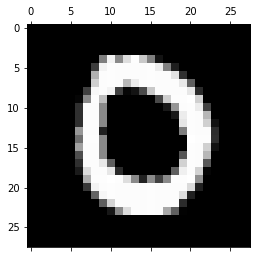

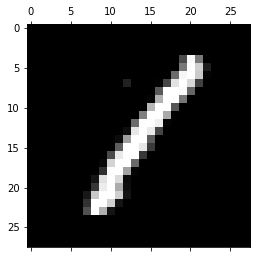

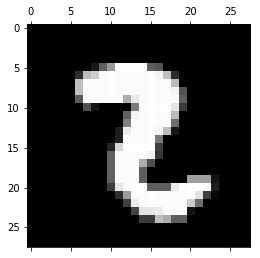

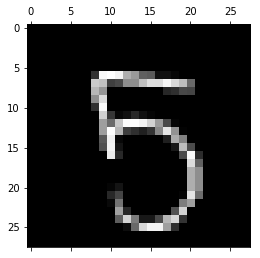

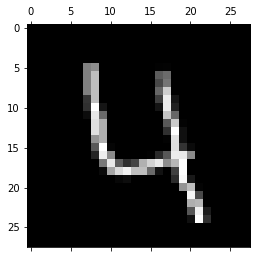

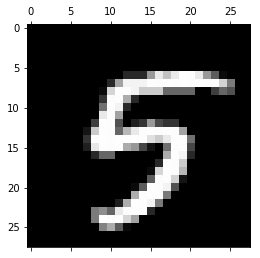

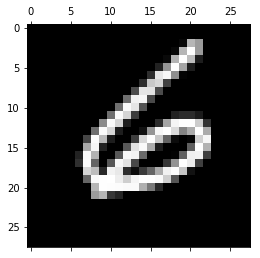

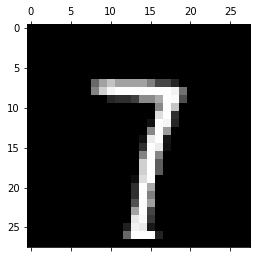

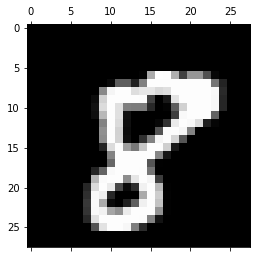

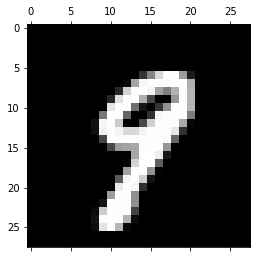

In [304]:
for n in closest_matches:
    show_image(n)

In [305]:
# Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
# digits, compute the pairwise distances for all genuine matches and all impostor matches,
# again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
# set of axes. SO: compare 1 with 1, 1 with 0, 0 with 0, 0 with 1

#np.where(np.equal(Predictions, Labels))

# ones = np.equal(1, y_training).nonzero()[0]
ones = x_training[y_training==1]
#array of index numbers with 0
zeros = x_training[y_training==0]
# zeros = np.equal(0, y_training).nonzero()[0]

#i dont think i use these
one_distances = []
zero_distances = []
mixed_distances = []

small_ones = ones[:400]
small_zeros = zeros[:400]

In [306]:
len(small_zeros), len(small_ones)

(400, 400)

In [307]:
ones

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [308]:
zero_distances= metrics.pairwise.euclidean_distances(small_zeros,small_zeros)

In [309]:
one_distances = metrics.pairwise.euclidean_distances(small_ones, small_ones)

In [310]:
mixed_distances = metrics.pairwise.euclidean_distances(small_ones, small_zeros)

In [311]:
zero_distances = zero_distances[np.tril(zero_distances) != 0]

In [312]:
one_distances = one_distances[np.tril(one_distances) != 0]

In [313]:
mixed_distances = mixed_distances[np.tril(mixed_distances) != 0]

In [314]:
one_distances

array([ 2217.55225418,  2007.76891101,  1024.84242691, ...,  2187.2585581 ,
        1160.72520434,  1166.73947392])

In [315]:
genuine_distances = []
genuine_distances.extend(zero_distances)
genuine_distances.extend(one_distances)
genuine_distances = np.array(genuine_distances)

In [316]:
imposter_distances = []
imposter_distances.extend(mixed_distances)
imposter_distances.extend(mixed_distances)
imposter_distances = np.array(imposter_distances)

In [317]:
len(imposter_distances)

160400

In [318]:
len(genuine_distances)

159600

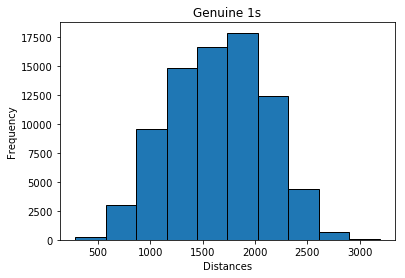

In [319]:
plt.hist(one_distances, edgecolor='black', linewidth=1)
plt.title("Genuine 1s")
plt.xlabel("Distances")
plt.ylabel("Frequency")

plt.show()
plt.savefig("genuine1s.png")

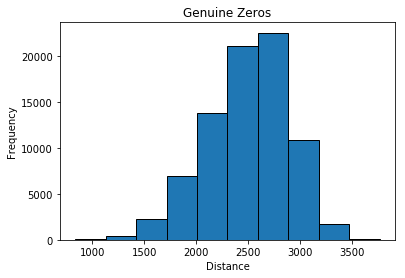

In [320]:
plt.hist(zero_distances, edgecolor='black', linewidth=1)
plt.title("Genuine Zeros")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.show()
plt.savefig("genuine0s.png")

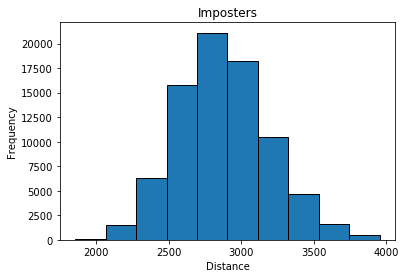

In [321]:
plt.figure()
plt.hist(mixed_distances, edgecolor='black', linewidth=1)
plt.title("Imposters")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.show()
plt.savefig("imposters.png")

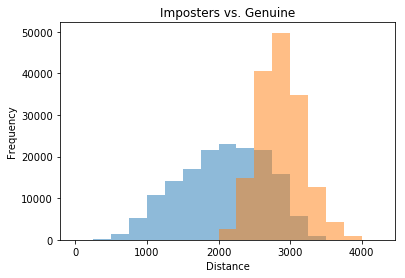

In [322]:
bincount_genuine = plt.hist(genuine_distances, bins = range(0, 4500, 250), alpha=0.5)
bincount_imposter = plt.hist(imposter_distances, bins = range(0, 4500, 250), alpha=0.5)

plt.title("Imposters vs. Genuine")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.show()

# ROC curve

In [323]:
bincount_genuine

(array([  0.00000000e+00,   1.09000000e+02,   1.39900000e+03,
          5.30400000e+03,   1.07290000e+04,   1.40760000e+04,
          1.69010000e+04,   2.16300000e+04,   2.30750000e+04,
          2.20150000e+04,   2.16930000e+04,   1.58240000e+04,
          5.83200000e+03,   9.53000000e+02,   5.90000000e+01,
          1.00000000e+00,   0.00000000e+00]),
 array([   0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500,
        2750, 3000, 3250, 3500, 3750, 4000, 4250]),
 <a list of 17 Patch objects>)

In [324]:
def roc(elements, totalCount):
    acc = 0
    results = []
    for x in totalCount:
        results.append(float(float(x + acc)/ float(elements)))
        acc = acc + x
    return results

In [325]:
len(genuine_distances)

159600

In [326]:
tpr = roc(len(genuine_distances),bincount_genuine[0])

In [327]:
fpr = roc(len(imposter_distances),bincount_imposter[0])

In [328]:
fpr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00019950124688279303,
 0.01564837905236908,
 0.10802992518703242,
 0.36069825436408975,
 0.6709102244389027,
 0.8883042394014963,
 0.9680798004987531,
 0.9946384039900249,
 1.0,
 1.0]

In [329]:
tpr

[0.0,
 0.0006829573934837093,
 0.009448621553884711,
 0.042681704260651626,
 0.10990601503759398,
 0.1981015037593985,
 0.3039974937343358,
 0.43952380952380954,
 0.5841040100250626,
 0.7220426065162907,
 0.8579636591478697,
 0.9571115288220552,
 0.9936528822055137,
 0.999624060150376,
 0.9999937343358396,
 1.0,
 1.0]

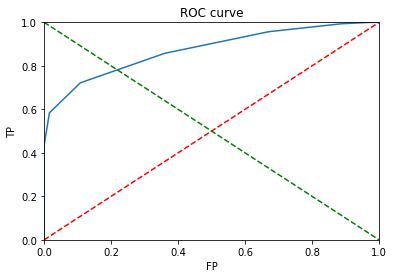

EER=0.10802992518703242
Random Guess=0.5


In [330]:
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("FP")
plt.ylabel("TP")
plt.plot([0, 1], [0, 1], 'r--', label='random guessing')
j = plt.plot([0, 1], [1, 0], 'g--', label='ERR')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

fnr =[]

for x in tpr:
    fnr.append(1 - x)

fn_rate = np.array(fnr)
fp_rate = np.array(fpr)
rates = np.absolute((fn_rate-fp_rate))

zerorate = np.argmin(rates)

EER = np.take(fpr, zerorate)

print('EER=' + str(float(EER)))
print('Random Guess='+str(float(0.5)))

In [331]:
fn_rate

array([  1.00000000e+00,   9.99317043e-01,   9.90551378e-01,
         9.57318296e-01,   8.90093985e-01,   8.01898496e-01,
         6.96002506e-01,   5.60476190e-01,   4.15895990e-01,
         2.77957393e-01,   1.42036341e-01,   4.28884712e-02,
         6.34711779e-03,   3.75939850e-04,   6.26566416e-06,
         0.00000000e+00,   0.00000000e+00])

In [332]:
len(fn_rate),len(fp_rate)

(17, 17)

In [333]:
for i in list(zip(fn_rate,fp_rate)):
    if abs(i[0]-i[1])<.2:
        print(i)

(0.27795739348370929, 0.10802992518703242)


# KNN

In [334]:
data_subset = x_training[0:400]
label_subset = y_training[0:400]

In [335]:
import operator
def knn(data, new_point, k, labels):
    predicted_label = []
    distances_knn = []
    
    for i in range(len(data)):
        if np.array_equal(data[i], new_point):
            continue
        else:
            distances_knn.append([np.linalg.norm(data[i]-new_point), labels[i]])
            
    distances_knn.sort()
    nearest_neighbors = [x[1] for x in distances_knn[:3]]
    temp = Counter(nearest_neighbors)
    assigned_label = temp.most_common(1)[0][0]
    predicted_label.append(assigned_label)
    return predicted_label
#returns a single predicted label for the one input

In [336]:
def run_points(points_to_search, data_subset, label_subset):
    actual_labels = []
    actual_predictions = []
    for i in range(len(points_to_search)):
        actual_predictions.append(knn(data_subset, points_to_search[i], 3, label_subset))
        actual_labels.append(label_subset[i])
    
    accuracy_count = 0
    for row in range(len(actual_predictions)):
        if actual_predictions[row] == actual_labels[row]:
            accuracy_count += 1
    print(float(accuracy_count)/float(len(actual_labels)))

In [337]:
run_points(data_subset[0:100], data_subset, label_subset)

0.8


# 3-fold cross-validation

In [338]:
#insert more points here

In [339]:
x_trainf, y_trainf, z_trainf = cross_validation.KFold(len(x_training[:1000]), n_folds=3)

In [340]:
train_indices = x_trainf[0]
test_indices = x_trainf[0]

train_indices2 = y_trainf[0]
test_indices2 = y_trainf[0]

train_indices3 = z_trainf[0]
test_indices3 = z_trainf[0]

In [341]:
testdata1 = x_training[test_indices]
traindata1 = x_training[train_indices]

testdata2 = x_training[test_indices2]
traindata2 = x_training[train_indices2]

testdata3 = x_training[test_indices3]
traindata3 = x_training[train_indices3]

In [342]:
hello = np.array(y_training, dtype='int32')
testlabels1 = hello[test_indices]
trainlabels1 = hello[train_indices]

testlabels2 = hello[test_indices2]
trainlabels2 = hello[train_indices2]

testlabels3 = hello[test_indices3]
trainlabels3 = hello[train_indices3]

In [343]:
def run_kk(test_data, train_data, train_labels, test_labels):
    correctcount = 0
    incorrect = 0
    for i,example in tqdm(enumerate(test_data)):
        assigned_class = knn(train_data, example, 3, train_labels)
        if assigned_class == test_labels[i]:
            correctcount +=1
        else:
            incorrect += 1

    return (float(correctcount)/(float(correctcount + incorrect)))

In [344]:
avg1 = run_kk(testdata3, traindata3, trainlabels3, testlabels3)

667it [00:12, 54.78it/s]


In [345]:
avg1

0.8380809595202399

In [346]:
avg2 = run_kk(testdata2, traindata2, trainlabels2, testlabels2)

667it [00:11, 55.94it/s]


In [347]:
avg2

0.863568215892054

In [348]:
avg3 = run_kk(testdata1, traindata1, trainlabels1, testlabels1)

666it [00:10, 65.20it/s]


In [349]:
avg3

0.8588588588588588

In [350]:
print("average accuracy is",(np.average([avg1, avg2, avg3])))

average accuracy is 0.85350267809


In [351]:
def run_points2(points_to_search, data_subset, label_subset):
    actual_labels = []
    actual_predictions = []
    for i in range(len(points_to_search)):
        actual_predictions.append(knn(data_subset, points_to_search[i], 3, label_subset))
        actual_labels.append(label_subset[i])
    return(actual_labels, actual_predictions)

#and change data_subset here
actuals_predicts = run_points2(data_subset, data_subset, label_subset)
predicts = [el[0] for el in actuals_predicts[1]]

confmatrix = metrics.confusion_matrix(actuals_predicts[0], predicts)

[[45  0  0  0  0  0  3  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 2  5 36  3  0  0  0  2  0  0]
 [ 1  2  1 33  0  2  0  1  0  1]
 [ 0  0  1  0 28  0  0  2  0  7]
 [ 2  1  0  3  0 22  1  1  2  1]
 [ 5  1  0  0  2  2 30  0  0  0]
 [ 0  2  0  0  0  0  0 34  0  5]
 [ 1  2  0  2  1  0  0  0 23  1]
 [ 0  0  0  0  3  2  0  4  0 34]]


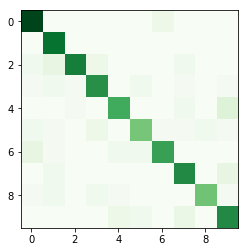

In [352]:
print(confmatrix)
plt.figure()
plt.imshow(confmatrix, cmap='Greens')
plt.savefig("confusionmatrix.png")

In [353]:
def run_testing_points(points_to_search, data_subset, label_subset):
    actual_predictions = []
    for i in tqdm(range(len(points_to_search))):
        actual_predictions.append(knn(data_subset, points_to_search[i], 3, label_subset))
    return actual_predictions

In [354]:
preds = run_testing_points(x_testing, data_subset, label_subset)

100%|██████████| 400/400 [00:13<00:00, 30.43it/s]


In [355]:
img_id = []
for i, x in enumerate(preds):
    img_id.append(i+1)

In [356]:
list(zip(img_id,preds))

[(1, [2]),
 (2, [0]),
 (3, [9]),
 (4, [7]),
 (5, [3]),
 (6, [7]),
 (7, [0]),
 (8, [3]),
 (9, [0]),
 (10, [3]),
 (11, [5]),
 (12, [7]),
 (13, [9]),
 (14, [0]),
 (15, [4]),
 (16, [3]),
 (17, [3]),
 (18, [1]),
 (19, [9]),
 (20, [0]),
 (21, [9]),
 (22, [1]),
 (23, [1]),
 (24, [5]),
 (25, [7]),
 (26, [9]),
 (27, [2]),
 (28, [7]),
 (29, [7]),
 (30, [7]),
 (31, [7]),
 (32, [5]),
 (33, [4]),
 (34, [2]),
 (35, [6]),
 (36, [2]),
 (37, [9]),
 (38, [5]),
 (39, [1]),
 (40, [0]),
 (41, [7]),
 (42, [7]),
 (43, [4]),
 (44, [9]),
 (45, [8]),
 (46, [7]),
 (47, [8]),
 (48, [3]),
 (49, [6]),
 (50, [1]),
 (51, [6]),
 (52, [8]),
 (53, [8]),
 (54, [3]),
 (55, [9]),
 (56, [2]),
 (57, [1]),
 (58, [2]),
 (59, [1]),
 (60, [0]),
 (61, [7]),
 (62, [1]),
 (63, [7]),
 (64, [0]),
 (65, [0]),
 (66, [0]),
 (67, [1]),
 (68, [9]),
 (69, [0]),
 (70, [1]),
 (71, [6]),
 (72, [5]),
 (73, [8]),
 (74, [8]),
 (75, [7]),
 (76, [8]),
 (77, [8]),
 (78, [9]),
 (79, [2]),
 (80, [2]),
 (81, [5]),
 (82, [9]),
 (83, [1]),
 (84, [0]),
 